In [61]:
# import wget
#
# url = 'http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz'
# myfile = wget.download(url)

In [62]:
# import tarfile
# file = tarfile.open('food-101.tar.gz')
# file.extractall('./food-101')

In [63]:
# Get labels
import json
import os

import keras.layers.activation
from tqdm.notebook import tqdm

def get_labels(label_path):
    """
    Accepts a label path (in the form of a JSON) and returns the file
    as a Python object.
    """
    with open(label_path) as f:
        return json.load(f)

train_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/train.json")
test_labels = get_labels("C:/Users/vivek/Downloads/food-101/food-101/meta/test.json")

In [64]:
# Should be 750 for training set and 250 for test set
print(len(train_labels["churros"]))
print(len(test_labels["churros"]))

750
250


In [65]:
import pathlib
import numpy as np
import tensorflow as tf
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
    targe_folder = target_dir+target_class
    random_image = random.sample(os.listdir(targe_folder),1)
    img = mpimg.imread(targe_folder+"/"+random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")
    return img

Image shape: (512, 341, 3)


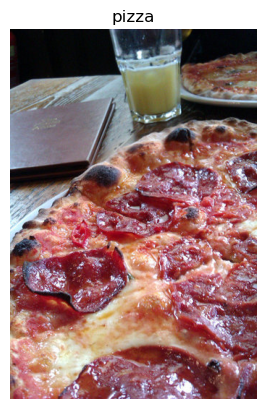

In [67]:
img = view_random_image(target_class="pizza",target_dir="pizza_steak/train/")

In [68]:

tf.constant(img)

<tf.Tensor: shape=(512, 341, 3), dtype=uint8, numpy=
array([[[  4,   6,   5],
        [  5,   7,   6],
        [  5,   7,   6],
        ...,
        [  4,   9,  12],
        [  5,  10,  14],
        [  3,  10,  18]],

       [[  4,   2,   3],
        [  5,   3,   4],
        [  5,   5,   5],
        ...,
        [  5,  10,  14],
        [  5,  10,  13],
        [  6,  12,  12]],

       [[ 10,   0,   1],
        [ 10,   1,   2],
        [  8,   4,   5],
        ...,
        [  4,   9,  15],
        [  5,  10,  13],
        [  5,  11,   7]],

       ...,

       [[150,  93,  76],
        [155,  85,  73],
        [151,  83,  72],
        ...,
        [ 69,  13,  22],
        [ 70,  15,  21],
        [ 71,  16,  22]],

       [[149,  91,  71],
        [153,  83,  71],
        [151,  81,  71],
        ...,
        [ 69,  13,  24],
        [ 71,  15,  26],
        [ 70,  17,  27]],

       [[147,  89,  67],
        [155,  83,  69],
        [153,  83,  75],
        ...,
        [ 71,  15,  2

In [69]:
img.shape

(512, 341, 3)

In [70]:
#Normalizing data
img/255.

array([[[0.01568627, 0.02352941, 0.01960784],
        [0.01960784, 0.02745098, 0.02352941],
        [0.01960784, 0.02745098, 0.02352941],
        ...,
        [0.01568627, 0.03529412, 0.04705882],
        [0.01960784, 0.03921569, 0.05490196],
        [0.01176471, 0.03921569, 0.07058824]],

       [[0.01568627, 0.00784314, 0.01176471],
        [0.01960784, 0.01176471, 0.01568627],
        [0.01960784, 0.01960784, 0.01960784],
        ...,
        [0.01960784, 0.03921569, 0.05490196],
        [0.01960784, 0.03921569, 0.05098039],
        [0.02352941, 0.04705882, 0.04705882]],

       [[0.03921569, 0.        , 0.00392157],
        [0.03921569, 0.00392157, 0.00784314],
        [0.03137255, 0.01568627, 0.01960784],
        ...,
        [0.01568627, 0.03529412, 0.05882353],
        [0.01960784, 0.03921569, 0.05098039],
        [0.01960784, 0.04313725, 0.02745098]],

       ...,

       [[0.58823529, 0.36470588, 0.29803922],
        [0.60784314, 0.33333333, 0.28627451],
        [0.59215686, 0

In [71]:
from keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)
train_datagen=ImageDataGenerator(rescale=1./255.)
valid_datagen=ImageDataGenerator(rescale=1./255.)

#setup path to data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

#Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)
valid_data = train_datagen.flow_from_directory(directory=test_dir,batch_size=32,target_size=(224,224),class_mode="binary",seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [72]:
#Build a CNN model
model_1 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.Conv2D(10,3,activation="relu"),
                                      tf.keras.layers.MaxPool2D(2),
                                      tf.keras.layers.Flatten(),
                                      tf.keras.layers.Dense(1,activation="sigmoid"),])
#compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

#fit the model
history_1 = model_1.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 155ms/step - loss: 0.5733 - accuracy: 0.6947 - val_loss: 0.3991 - val_accuracy: 0.8340
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4450 - accuracy: 0.8073 - val_loss: 0.3983 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 6s 128ms/step - loss: 0.4113 - accuracy: 0.8260 - val_loss: 0.4397 - val_accuracy: 0.7900
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3623 - accuracy: 0.8447 - val_loss: 0.3686 - val_accuracy: 0.8340
Epoch 5/5
47/47 [==============================] - 6s 121ms/step - loss: 0.2775 - accuracy: 0.8960 - val_loss: 0.4052 - val_accuracy: 0.8240


In [73]:
model_1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_14 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 110, 110, 10)     0         
 2D)                                                             
                                                                 
 conv2d_15 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_16 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                  

In [74]:
#009 Trying a non-CNN model on our image data
#trying to fit image data in non-cnn model
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid"),]
)
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=valid_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 125ms/step - loss: 0.9762 - accuracy: 0.5107 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 6s 120ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [75]:
#010 Improving our non-CNN model by adding more layers

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"), ]
)
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 122ms/step - loss: 2.6004 - accuracy: 0.6407 - val_loss: 0.7995 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.9530 - accuracy: 0.7053 - val_loss: 0.5381 - val_accuracy: 0.7580
Epoch 3/5
47/47 [==============================] - 6s 119ms/step - loss: 0.6079 - accuracy: 0.7427 - val_loss: 0.4816 - val_accuracy: 0.7800
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.5404 - accuracy: 0.7780 - val_loss: 0.4673 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 6s 118ms/step - loss: 0.5994 - accuracy: 0.7513 - val_loss: 0.4864 - val_accuracy: 0.7560


Image shape: (512, 512, 3)


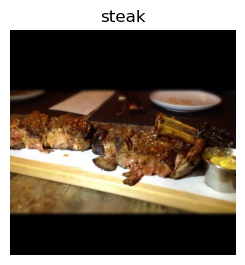

In [76]:
#011 Breaking our CNN model down part 1 Becoming one with the data
# biany classification breakdown
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")



In [77]:
#012 Breaking our CNN model down part 2 Preparing to load our data
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)


In [78]:
train_data=train_datagen.flow_from_directory(directory=train_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)
#013 Breaking our CNN model down part 3 Loading our data with ImageDataGenerator
test_data=test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(244,244),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [79]:
images,labels = train_data.next()
len(images),len(labels)

(32, 32)

In [80]:
#Get the images
images[:2],images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [81]:
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

In [82]:
#014 Breaking our CNN model down part 4 Building a baseline CNN model
# create a CNN model (Baseline model)
from keras.optimizers import Adam
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation,Dropout
from keras import Sequential

# create the baseline model
model_4 = Sequential([
    Conv2D(filters=10,
           kernel_size=(3,3),
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(244,244,3)),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    Flatten(),
    Dense(1,activation="sigmoid")
])



In [83]:
len(train_data),len(test_data)

(47, 16)

In [84]:
#015 Breaking our CNN model down part 5 Looking inside a Conv2D layer
#016 Breaking our CNN model down part 6 Compiling and fitting our baseline CNN
#Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics = ["accuracy"])

#Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 7s 132ms/step - loss: 2.3325 - accuracy: 0.6687 - val_loss: 0.3946 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3859 - accuracy: 0.8400 - val_loss: 0.3651 - val_accuracy: 0.8480
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.2276 - accuracy: 0.9220 - val_loss: 0.3634 - val_accuracy: 0.8280
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.0908 - accuracy: 0.9807 - val_loss: 0.5323 - val_accuracy: 0.8040
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.0305 - accuracy: 0.9940 - val_loss: 0.5983 - val_accuracy: 0.7940


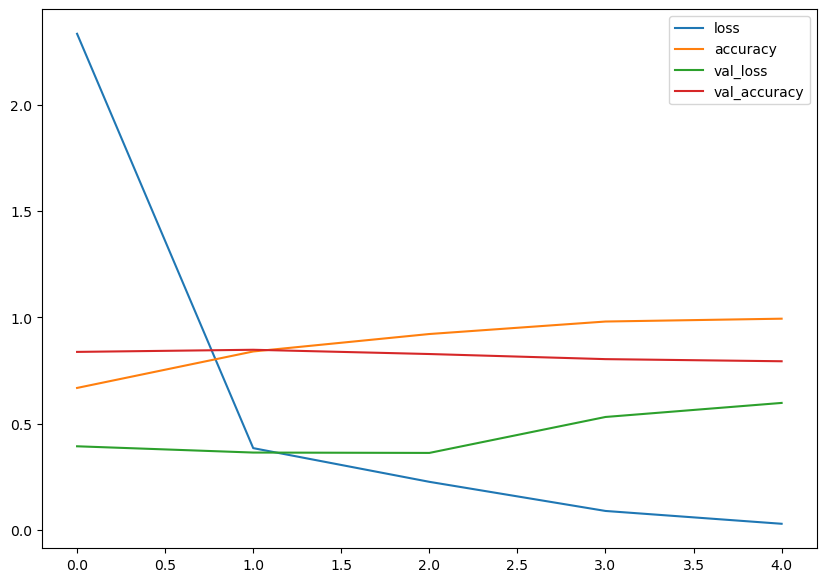

In [85]:
#017 Breaking our CNN model down part 7 Evaluating our CNN's training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [86]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))

    plt.plot(epochs,loss,label="training_loss")
    plt.plot(epochs,val_loss,label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    #plot  accuracy
    plt.figure()
    plt.plot(epochs,accuracy,label="training_accuracy")
    plt.plot(epochs,val_accuracy,label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()


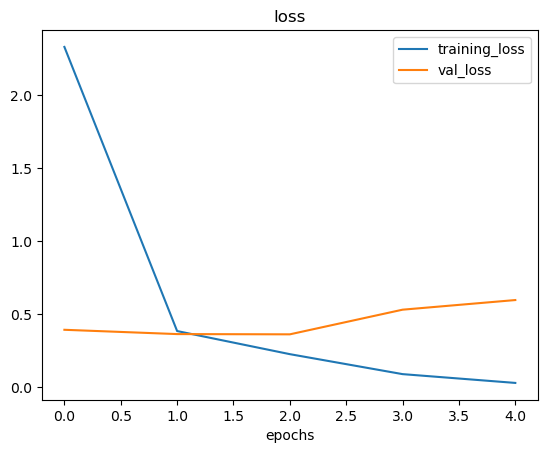

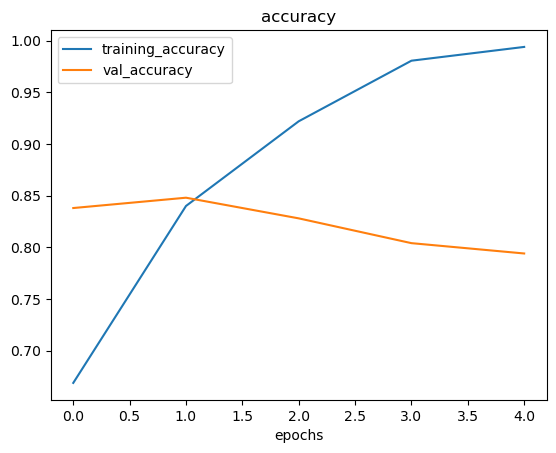

In [87]:
plot_loss_curves(history_4)

In [88]:
#018 Breaking our CNN model down part 8 Reducing overfitting with Max Pooling
# ideally the above loss curves should be very similar to each other
# adjust the model Parameters
model_5 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(244,244,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Dropout(0.3),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation=tf.keras.activations.sigmoid)
])



In [89]:
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=Adam(),
                metrics=['accuracy'])

In [90]:
history_5 = model_5.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6789 - accuracy: 0.5233 - val_loss: 0.6586 - val_accuracy: 0.5520
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.5045 - accuracy: 0.7487 - val_loss: 0.5349 - val_accuracy: 0.6960
Epoch 3/5
47/47 [==============================] - 6s 129ms/step - loss: 0.4279 - accuracy: 0.8047 - val_loss: 0.3681 - val_accuracy: 0.8620
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.4051 - accuracy: 0.8147 - val_loss: 0.4210 - val_accuracy: 0.8180
Epoch 5/5
47/47 [==============================] - 6s 129ms/step - loss: 0.3885 - accuracy: 0.8280 - val_loss: 0.3744 - val_accuracy: 0.8440


In [91]:
model_5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 242, 242, 10)      280       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 121, 121, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 119, 119, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 59, 59, 10)       0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 59, 59, 10)        0         
                                                                 
 conv2d_22 (Conv2D)          (None, 57, 57, 10)      

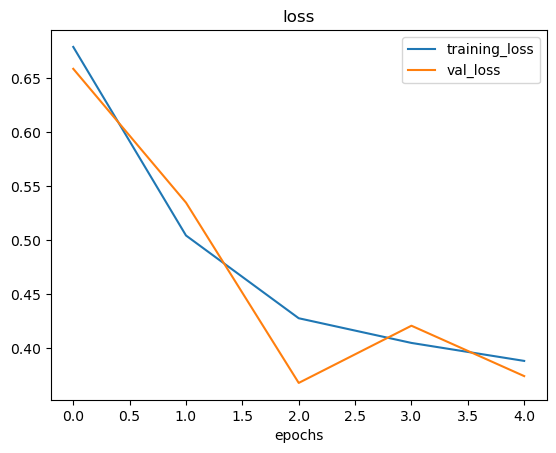

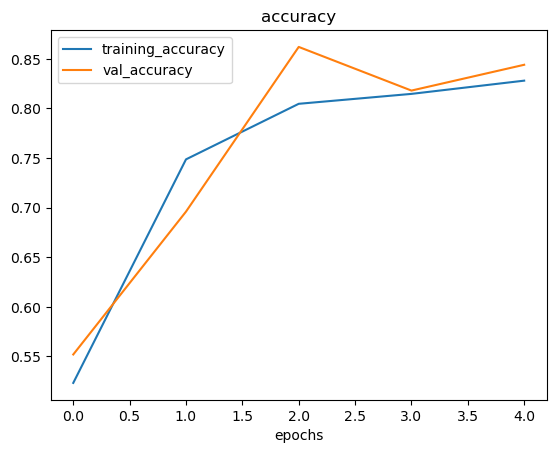

In [92]:
plot_loss_curves(history_5)

In [93]:
#019 Breaking our CNN model down part 9 Reducing overfitting with data augmentation
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          width_shift_range=0.2,
                                          height_shift_range=0.3,
                                          horizontal_flip=True,)
train_datagen=ImageDataGenerator(rescale=1/255.)
test_datagen=ImageDataGenerator(rescale=1/255.)

In [94]:
#020 Breaking our CNN model down part 10 Visualizing our augmented data
train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

train_data= train_datagen.flow_from_directory(train_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)
test_data= test_datagen.flow_from_directory(test_dir,
                                                                target_size=(244,244),
                                                                batch_size=32,
                                                                class_mode="binary",
                                                                shuffle=True)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [95]:
images,labels = test_data.next()
augmentd_images,augmented_labels = train_data_augmented.next()

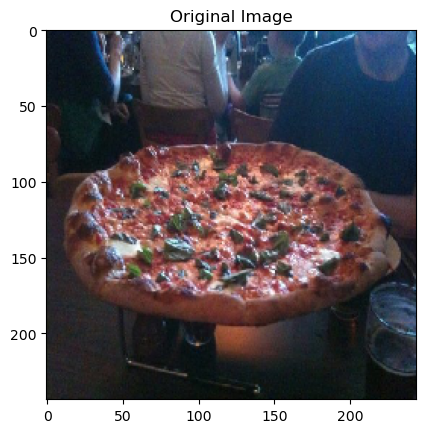

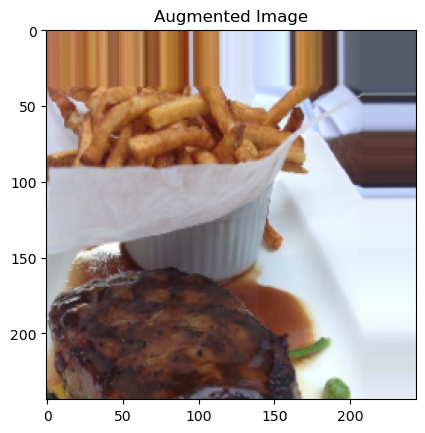

In [96]:
random_number = random.randint(0,31)
plt.imshow(images[random_number])
plt.title("Original Image")
plt.show()
plt.imshow(augmentd_images[random_number])
plt.title("Augmented Image")
plt.show()

In [97]:
#021 Breaking our CNN model down part 11 Training a CNN model on augmented data
model_6 = Sequential([
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(pool_size=2),
    Conv2D(10,3,activation=tf.keras.activations.relu),
    MaxPool2D(),
    Flatten(),
    Dense(1,activation=tf.keras.activations.sigmoid)
])

model_6.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(),metrics=["accuracy"])
history_6=model_6.fit(train_data_augmented,epochs=5,steps_per_epoch=len(train_data_augmented),validation_data=test_data,validation_steps=len(test_data))


Epoch 1/5
47/47 [==============================] - 18s 370ms/step - loss: 0.6650 - accuracy: 0.5827 - val_loss: 0.5542 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 17s 368ms/step - loss: 0.5622 - accuracy: 0.7113 - val_loss: 0.4140 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 17s 370ms/step - loss: 0.5081 - accuracy: 0.7653 - val_loss: 0.4036 - val_accuracy: 0.8220
Epoch 4/5
47/47 [==============================] - 17s 362ms/step - loss: 0.4838 - accuracy: 0.7707 - val_loss: 0.3729 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 17s 359ms/step - loss: 0.4935 - accuracy: 0.7653 - val_loss: 0.4009 - val_accuracy: 0.8380


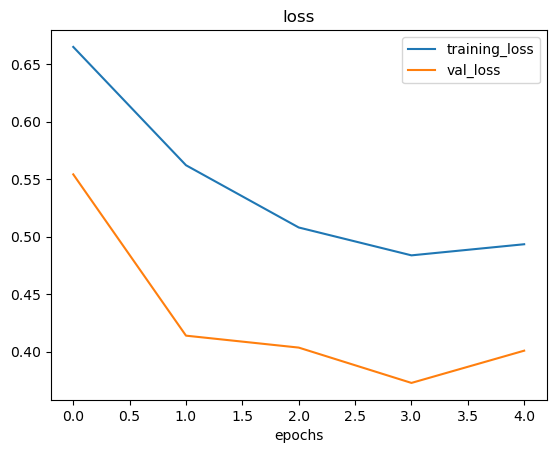

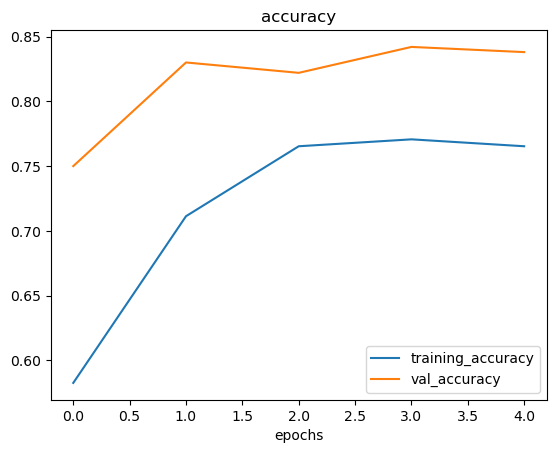

In [98]:
plot_loss_curves(history_6)

In [99]:
#022 Breaking our CNN model down part 12 Discovering the power of shuffling data
#Train a model with Shuffle = True

In [100]:
#023 Breaking our CNN model down part 13 Exploring options to improve our model
#024 Downloading a custom image to make predictions on
print(class_names)

['pizza' 'steak']


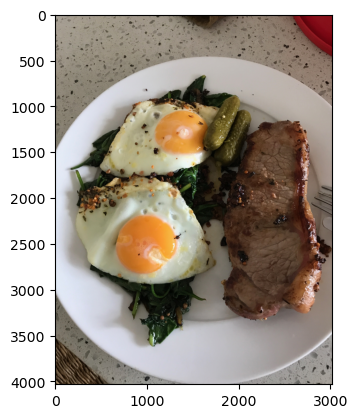

In [101]:
import matplotlib.image as mpimg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)

In [102]:
steak.shape

(4032, 3024, 3)

In [103]:
def load_and_prep_image(filename,img_shape=244):
    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img,size=[img_shape,img_shape])
    img = img/255
    return img

In [104]:
#025 Writing a helper function to load and preprocessing custom images
steak=load_and_prep_image("03-steak.jpeg")

In [105]:
pred=model_6.predict(tf.expand_dims(steak,axis=0))

1/1 [==============================] - 0s 52ms/step


In [106]:
#026 Making a prediction on a custom image with our trained CNN
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [107]:
def pred_and_plot(model,filename, class_name = class_names):
    img = load_and_prep_image(filename)
    pred = model.predict(tf.expand_dims(img,axis=0),verbose=0)
    pred_class = class_names[int(tf.round(pred))]
    plt.imshow(img)
    plt.title(f"Prediction : {pred_class}")
    plt.axis(False)

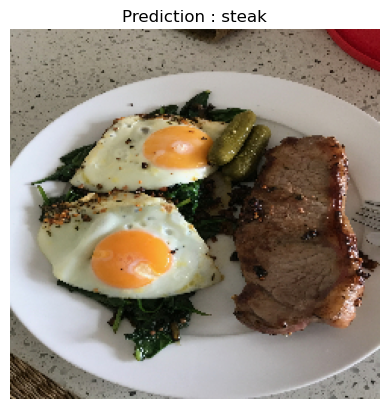

In [108]:
pred_and_plot(model_6,"03-steak.jpeg")

In [109]:
#027 Multi-class CNN's part 1 Becoming one with the data
#Multi Class image classification
import os
for dirpath,dirnames,filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [110]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [111]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (341, 512, 3)


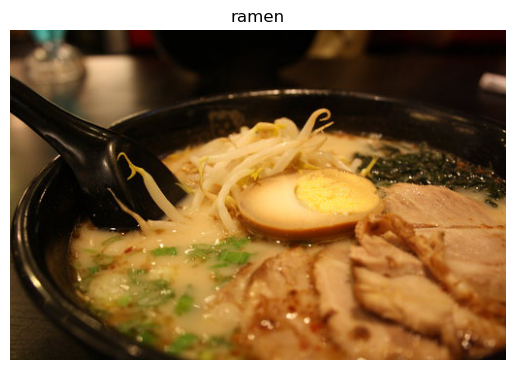

In [112]:
import random
img = view_random_image(target_dir=train_dir,target_class=random.choice(class_names))

In [113]:
#028 Multi-class CNN's part 2 Preparing our data (turning it into tensors)
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224),batch_size=32,class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,target_size=(224,224),batch_size=32,class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [116]:
#029 Multi-class CNN's part 3 Building a multi-class CNN model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation

model_8 = Sequential([
    Conv2D(10,3,input_shape=(224,224,3)),
    Activation(activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax"), # Sigmoid best for 2 categories but softmax best for 10 categories
])

model_8.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])



In [117]:
#030 Multi-class CNN's part 4 Fitting a multi-class CNN model to the data
history_8 = model_8.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data
                                                                                                                           ))

Epoch 1/5
235/235 [==============================] - 36s 152ms/step - loss: 2.1307 - accuracy: 0.2183 - val_loss: 1.9447 - val_accuracy: 0.3164
Epoch 2/5
235/235 [==============================] - 30s 129ms/step - loss: 1.8602 - accuracy: 0.3556 - val_loss: 1.9196 - val_accuracy: 0.3244
Epoch 3/5
235/235 [==============================] - 31s 130ms/step - loss: 1.5488 - accuracy: 0.4732 - val_loss: 2.0134 - val_accuracy: 0.2992
Epoch 4/5
235/235 [==============================] - 30s 129ms/step - loss: 1.0252 - accuracy: 0.6612 - val_loss: 2.3676 - val_accuracy: 0.3016
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.4386 - accuracy: 0.8644 - val_loss: 3.3282 - val_accuracy: 0.2700


In [118]:
#031 Multi-class CNN's part 5 Evaluating our multi-class CNN model
model_8.evaluate(test_data)

79/79 [==============================] - 7s 88ms/step - loss: 3.3282 - accuracy: 0.2700


[3.3282206058502197, 0.27000001072883606]

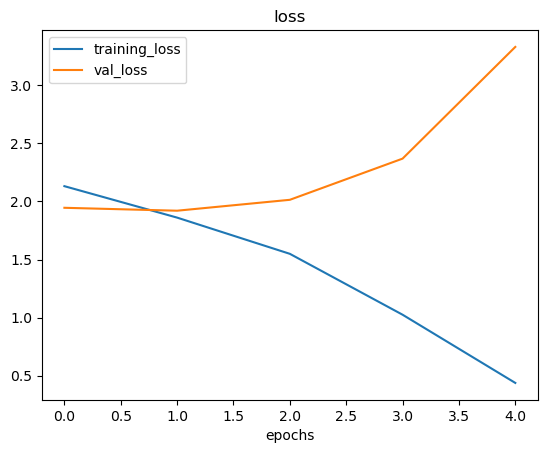

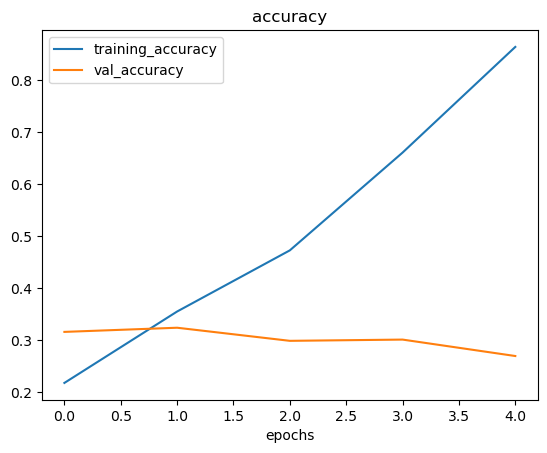

In [119]:
#Loss curves
plot_loss_curves(history_8)

In [123]:
 #Seems our model is overfitting , its better on training data
#032 Multi-class CNN's part 6 Trying to fix overfitting by removing layers
#lets try to remove 2 conv layers form the model
model_9 = Sequential([
    Conv2D(10,3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation="softmax"), # Sigmoid best for 2 categories but softmax best for 10 categories
])
model_9.compile(loss="categorical_crossentropy",
                optimizer=keras.optimizers.Adam(),
                metrics=['accuracy'])

In [124]:
model_9.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 29160)             0         
                                                                 
 dense_25 (Dense)            (None, 10)              

In [125]:
history_9 = model_9.fit(train_data,epochs=5,steps_per_epoch=len(train_data),validation_data=test_data,validation_steps=len(test_data
                                                                                                                           ))

Epoch 1/5
235/235 [==============================] - 37s 152ms/step - loss: 2.2160 - accuracy: 0.2051 - val_loss: 2.0150 - val_accuracy: 0.2856
Epoch 2/5
235/235 [==============================] - 30s 127ms/step - loss: 1.8201 - accuracy: 0.3712 - val_loss: 1.9239 - val_accuracy: 0.3280
Epoch 3/5
235/235 [==============================] - 30s 127ms/step - loss: 1.4143 - accuracy: 0.5295 - val_loss: 1.9969 - val_accuracy: 0.3344
Epoch 4/5
235/235 [==============================] - 30s 127ms/step - loss: 0.8970 - accuracy: 0.7165 - val_loss: 2.2448 - val_accuracy: 0.3044
Epoch 5/5
235/235 [==============================] - 30s 127ms/step - loss: 0.4674 - accuracy: 0.8696 - val_loss: 2.6977 - val_accuracy: 0.3000


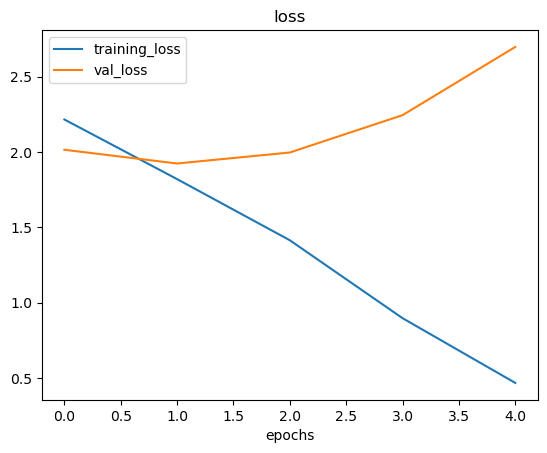

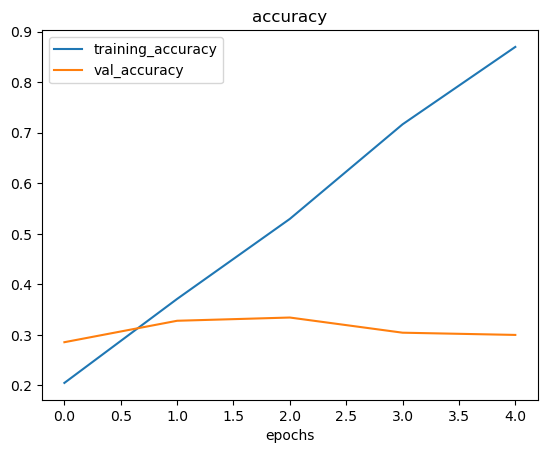

In [126]:
plot_loss_curves(history_9)

In [ ]:
# trying data augmentation
#033 Multi-class CNN's part 7 Trying to fix overfitting with data augmentation
